In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib as mpl
import numpy as np
from skimage.io import imread, imsave
from a72_utilities import *
from scipy.interpolate import interp1d

In [22]:
al_5L = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Aligned images/Al 5L aligned.tif")
al_100L = imread("/Users/apple/Sync/Research/Alloy 72/2025-3-5 Brookhaven A72 Oxidation/Aligned images/Al 100L XAS aligned.tif")
al_energy = np.arange(75,90.2,.2)
print(al_5L.shape)

(77, 1024, 1024)


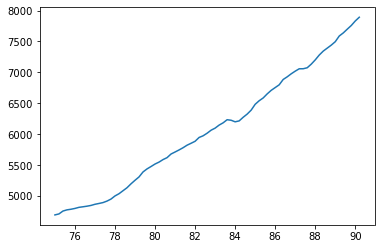

In [23]:
plt.plot(al_energy, np.average(al_5L,axis=(1,2)))

      Energy  Intensity  Smoothed Intensity
0  75.000000     0.2935             0.30821
1  75.133929     0.3209             0.31058
2  75.267857     0.3197             0.31295
3  75.401786     0.3009             0.31532
4  75.535714     0.3277             0.31769


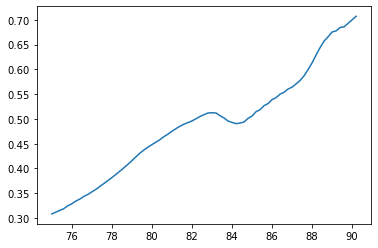

In [37]:
al_br = pd.read_csv('/Users/apple/Sync/Research/Alloy 72/Al2p background smoothed.csv')
al_br_ref = interp1d(al_br['Energy'], al_br['Smoothed Intensity'], fill_value="extrapolate")
al_br_interp = (al_br_ref(al_energy))
print(al_br.head())
#plt.plot(al_br['Energy'], al_br['Smoothed Intensity'])
plt.plot(al_energy, al_br_interp)


In [40]:
def remove_al_br(al_data,al_br_int):
    al_br_ones = (np.ones(al_data.shape))*(np.reshape(al_br_int,(len(al_br_int),1,1))) #make a background array with the same shape as the xas data
    return  al_data-al_br_ones*(np.average(al_data[:4,:,:],axis=(0)))


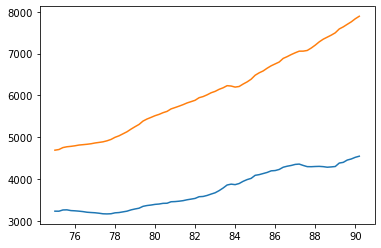

In [39]:
"""This way works but I'm not sure if it's correct"""
al_br_ones = (np.ones(al_5L.shape))*(np.reshape(al_br_interp,(len(al_br_interp),1,1))) #make a background array with the same shape as the xas data
al_5L_br_subtracted = al_5L-al_br_ones*(np.average(al_5L[:4,:,:],axis=(0)))
#al_5L_br_subtracted = al_5L-np.average(al_5L[:4,:,:],axis=(0))-al_br_ones*(np.average(al_5L[-4:,:,:],axis=(0))-np.average(al_5L[:4,:,:],axis=(0)))*.5
plt.plot(al_energy, np.average(al_5L_br_subtracted,axis=(1,2)))
plt.plot(al_energy, np.average(al_5L,axis=(1,2)))

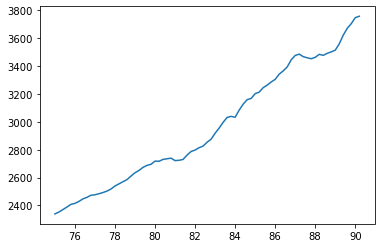

In [42]:
plt.plot(al_energy, np.average(remove_al_br(al_100L,al_br_interp),axis=(1,2)))
#plt.plot(al_energy, np.average(al_100L,axis=(1,2)))